## Data Validation and Analysis for Simulated Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preprocessing

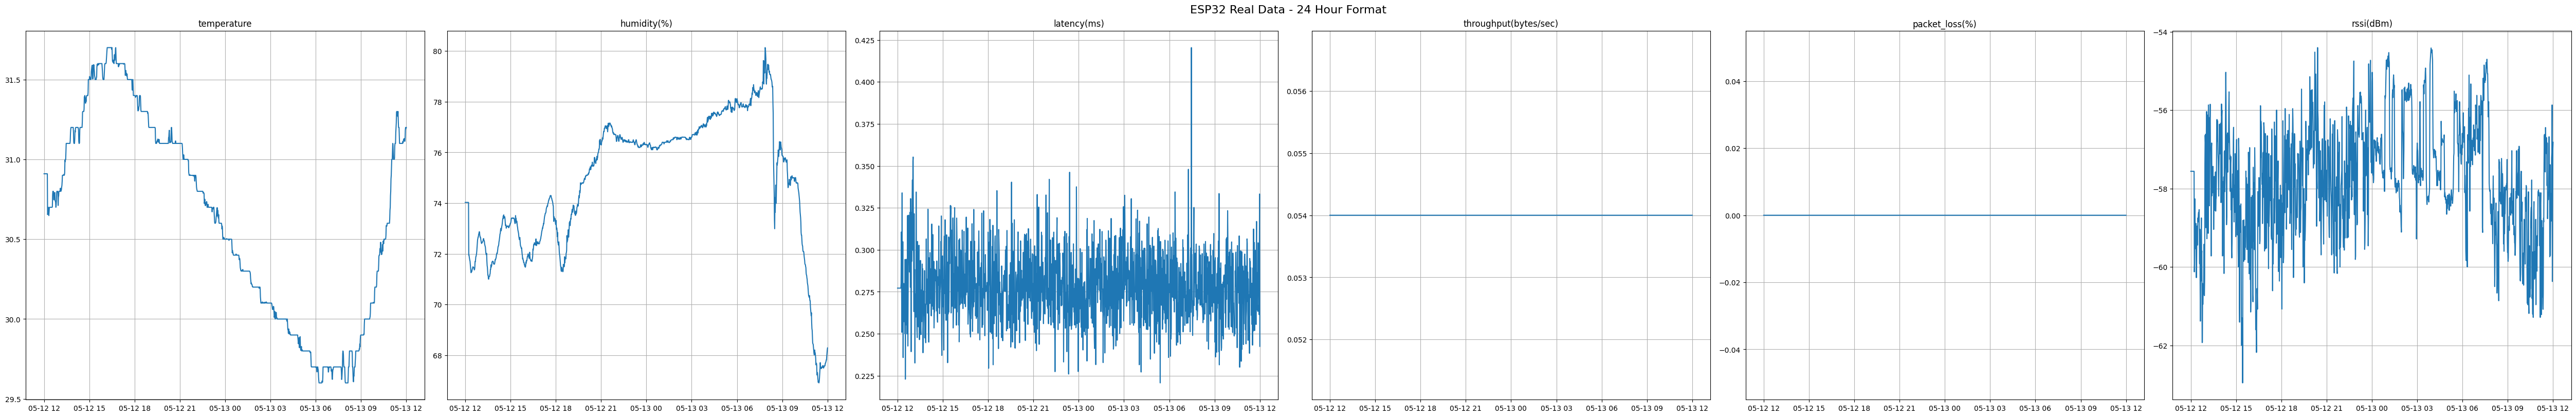

In [6]:
# Load the real data
real_data = pd.read_csv("../dataset/esp32_1_data.csv")

# Change the time column to datetime format and split it into date and time
real_data["timestamp"] = pd.to_datetime(real_data["timestamp"], format="%Y-%m-%d | %H:%M:%S")

# Set the timestamp as the index
real_data.set_index("timestamp", inplace=True)
df_resampled = real_data.resample("min").mean()

# Impute missing values using mean of the column
df_resampled.fillna(df_resampled.mean(), inplace=True)

# Show the data in 24 hours from 12:00:00 to 12:00:00
df_one_day_format = df_resampled.loc["2025-05-12 12:00:00":"2025-05-13 12:00:00"]

# Define num of rows and columns for the subplots
num_cols = 6
num_rows = int(np.ceil(len(df_one_day_format.columns) / num_cols))

# Create the figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 8), constrained_layout=True)

# Flatten the axes array for iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(df_one_day_format.columns):
  axes[i].plot(df_one_day_format[column])
  axes[i].set_title(column)
  axes[i].grid(True)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

# Set the overall title for the figure
fig.suptitle("ESP32 Real Data - 24 Hour Format", fontsize=16)
plt.show()

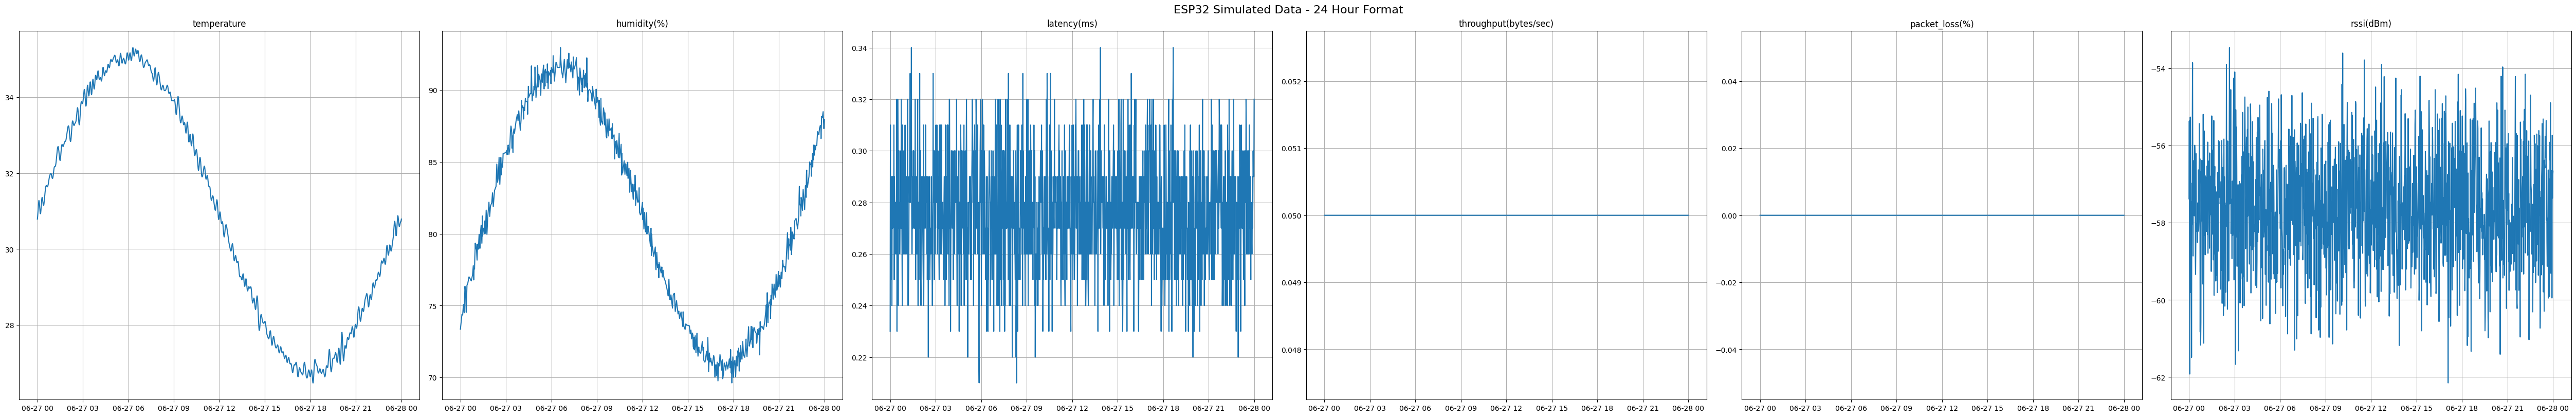

In [39]:
# Load the dataset
simulated_data = pd.read_csv("../dataset/simulation_data_20250627_091821.csv")

# Change the time column to datetime format and split it into date and time
simulated_data["timestamp"] = pd.to_datetime(simulated_data["timestamp"], format="%Y-%m-%d | %H:%M:%S")

# Set the timestamp as the index
simulated_data.set_index("timestamp", inplace=True)

# Define num of rows and columns for the subplots
num_cols = 6
num_rows = int(np.ceil(len(simulated_data.columns) / num_cols))

# Create the figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 8), constrained_layout=True)

# Flatten the axes array for iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(simulated_data.columns):
  axes[i].plot(simulated_data[column])
  axes[i].set_title(column)
  axes[i].grid(True)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

# Set the overall title for the figure
fig.suptitle("ESP32 Simulated Data - 24 Hour Format", fontsize=16)
plt.show()

## Data Validation

In [ ]:
# Define columns list
columns_list = ["temperature", "humidity(%)", "latency(ms)", "rssi(dBm)", "throughput(bytes/sec)", "packet_loss(%)"]
error_metrics = []

# Calculate error metrics for each column
for column in columns_list:
  mse = mean_squared_error(df_one_day_format[column], simulated_data[column])
  rmse = np.sqrt(mse)
  mape = mean_absolute_percentage_error(df_one_day_format[column], simulated_data[column])
  mae = mean_absolute_error(df_one_day_format[column], simulated_data[column])
  r2 = r2_score(df_one_day_format[column], simulated_data[column])
  error_metrics.append({
    "Column": column,
    "MSE": mse,
    "RMSE": rmse,
    "MAPE": mape,
    "MAE": mae,
    "R2": r2
  })

# Create a DataFrame for error metrics
error_metrics_df = pd.DataFrame(error_metrics)
error_metrics_df

,Column,MSE,RMSE,MAPE,MAE,R2
0,temperature,5.562114,2.358413,0.069528,2.132080,-1.267296e+01
1,humidity(%),118.344372,10.878620,0.124688,9.188245,-1.518108e+01
2,latency(ms),0.000924,0.030393,0.086276,0.023977,-1.137300e+00
3,rssi(dBm),4.064022,2.015942,0.027961,1.616903,-9.588556e-01
4,throughput(bytes/sec),0.000016,0.004000,0.074074,0.004000,-9.045228e+28
5,packet_loss(%),0.000000,0.000000,0.000000,0.000000,1.000000e+00
